# Case 1

In [133]:
import pandas as pd
import sklearn as skl
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy.linalg as npl
import seaborn as sns
import scipy.linalg as lng
import scipy.io
from sklearn import preprocessing

# I - Handle Misssing Data

## Read data

In [176]:
data = pd.read_csv('dataCase1.csv')
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
0,-4.551892,-1.809625,-0.913360,-0.218107,0.687713,-1.357434,3.087521,0.134304,5.501414,0.480548,...,1.935061,-0.364959,0.228810,-0.145521,-1.754263,B,A,C,C,H
1,1.806876,NaN,-2.067355,-0.259221,1.682711,-0.899337,-0.448752,0.246285,2.007544,1.669644,...,2.129238,2.873889,-0.956736,2.946482,0.348536,B,B,D,B,B
2,-7.418004,3.145955,-1.434793,-2.355750,2.145708,-2.730022,0.181677,-1.603840,1.481230,0.863563,...,3.011292,0.023706,-0.118926,-1.329891,-0.549678,B,B,B,D,E
3,-8.776398,-0.966571,2.768401,-1.016546,2.579520,-2.989883,1.299483,0.537700,1.972970,0.214713,...,2.334895,0.131329,-1.506334,-1.198288,-0.061236,B,B,A,B,D
4,-6.755842,-0.998227,0.657886,-1.104707,1.289966,-3.907128,0.901370,0.497693,1.794773,0.779314,...,3.131590,-1.299633,-0.861064,0.672235,-0.659976,A,C,D,D,D


## Work without the NaN values

In [6]:
for col in data.columns:
    print(data.loc[np.isnan(data[col]) == True])

       Y        X1        X2        X3        X4        X5        X6  \
100  NaN  1.198527  4.559634 -0.028007  0.678247 -1.398437  2.251363   
101  NaN -1.678097 -0.280255  2.746946  1.656956 -1.153272  1.714804   
102  NaN  0.492039  2.918478  0.828985  1.722888  1.048289  1.912647   
103  NaN  1.356370 -2.226176 -0.525003  2.748485 -2.368711  1.007910   
104  NaN -1.106479 -0.429998 -0.586983  0.305857 -1.502526 -0.784669   
105  NaN  1.781127  1.225249  1.007033  1.598830  0.541656 -2.579786   
106  NaN  0.038402 -1.597729 -0.997141  1.409106 -1.772965  1.346206   
107  NaN -0.127882  0.889384 -2.254493  0.622136 -1.633340  1.502921   
108  NaN  0.822378 -2.104478  1.594374  0.792520 -0.839497  0.850772   
109  NaN -0.581750  1.442742 -0.330471  1.173408 -2.263250  0.040534   
110  NaN  0.976199 -0.567030 -2.525858  2.500462 -0.865530  0.550688   
111  NaN  0.477435 -0.329606 -0.637425  2.258057 -3.386475 -0.280863   
112  NaN -0.036873  0.639765  0.220243  1.072019 -2.678516 -1.99

            Y        X1        X2        X3        X4        X5        X6  \
19  -9.265716 -2.171364  1.912714 -1.914513 -1.033373 -1.538249  2.102044   
196       NaN  0.156326 -1.389009 -1.809146  0.101850 -2.546924  1.317622   
232       NaN  0.856208  0.828484 -1.311536  0.118055 -0.967776  0.641202   
440       NaN -0.943814 -1.440020  0.946944  0.342600 -2.219057  1.350875   
520       NaN  0.000669 -0.869673 -0.465566  0.381664 -3.208344  0.339462   
707       NaN  1.727810  0.667154 -0.183714  0.712106 -3.711941  0.301664   
758       NaN  0.849112  0.579263  0.515461 -0.047929 -0.975827 -1.251273   
763       NaN -1.088568  1.651410 -0.750127  1.574544 -0.425461 -0.002079   
900       NaN  1.434844 -0.262945 -0.186255  0.589498 -1.477332 -2.471478   

           X7        X8        X9  ...       X91       X92       X93  \
19  -1.618261  1.801989 -0.159582  ...  2.320082  0.668003 -0.472456   
196 -0.337753  1.233672  0.844528  ...  1.314619  0.166462  0.707251   
232  1.589314

       Y        X1        X2        X3        X4        X5        X6  \
132  NaN -0.392935  1.219921 -0.514386  1.504366 -1.607968 -0.563523   
142  NaN  2.603599 -0.478443  0.485199  1.849631 -1.118489 -0.372507   
227  NaN -0.538379  0.884450 -1.459730  1.015521 -3.423965  1.362224   
276  NaN  1.041172  0.848768 -0.158981 -2.193015 -2.282588 -0.151428   
361  NaN -0.029600 -1.676814 -1.544797  0.807558 -2.821328  1.111707   
553  NaN -1.198239  0.789580  0.007309  2.320557 -1.525315  1.050843   
556  NaN  1.536337 -1.695977  0.122362  1.438054 -1.744698 -0.156545   
756  NaN  1.601959 -0.146742  0.018286  2.173077 -2.203682  0.777685   
867  NaN  2.383300 -0.563422  0.332786  3.767328  0.303462 -1.141021   
1002 NaN  0.257316  4.656785 -0.462564  1.805734 -0.026708 -0.964601   
1049 NaN  1.729190       NaN  0.032389  0.303955 -1.054470  1.755253   

            X7        X8        X9  ...       X91       X92       X93  \
132  -1.400521  2.691340  0.589921  ...  1.817436  2.837753  0

      Y        X1        X2        X3        X4        X5        X6        X7  \
115 NaN -1.173688 -0.280950  1.298142  2.765668 -1.445201  0.117506 -0.264315   
147 NaN  2.992962  4.564289  0.652963  1.431511 -2.390840 -0.082969 -1.634152   
244 NaN  4.000287  1.299894 -0.113570  2.536457 -0.809214 -0.922648 -0.207859   
257 NaN  1.183992 -0.009841 -0.867737  1.554525 -2.174654  0.284263 -0.094783   
472 NaN  0.913433  0.952624 -0.801025  3.329194 -1.895413  0.263155 -0.014146   
620 NaN  1.284419  0.590940  0.705614  0.242890 -1.591145  1.213703  1.281994   
734 NaN -1.056545  1.108207 -0.515760  1.725998 -1.535228  2.171122  1.059155   
992 NaN  0.032545  0.249313  0.137227  0.251417 -1.150500  0.308711  1.261449   

           X8        X9  ...       X91       X92       X93       X94  \
115  2.719340  1.313217  ... -0.627204  0.352144  0.021859 -0.465310   
147  2.986749  0.210651  ...  2.638425  1.137541 -1.538315  0.823154   
244  1.824570 -1.157445  ...  1.206169  1.375396  0.72

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Mean and standard deviation of each continuous variable

In [83]:
substitute_values_column = {}
for col in data.columns:
    if data[col].dtype != 'object' and col != 'Y':
       substitute_values_column[col] = np.mean(data[col].dropna())/np.std(data[col].dropna())

In [171]:
data1 = data.copy()
data1 = data1.fillna(value=substitute_values_column)

### variance differences vector

In [85]:
dic_size = len(substitute_values_column)
var_diff = np.zeros(dic_size)
i = 0
for col in substitute_values_column.keys():
    var_diff[i] = np.var(data[col].dropna())-np.var(data1[col])
    i += 1
    
var_diff

array([0.00851565, 0.04108984, 0.01485359, 0.00973402, 0.01411407,
       0.02492159, 0.00830184, 0.01227332, 0.01911789, 0.01026114,
       0.00995888, 0.01573824, 0.00596867, 0.01262208, 0.00468855,
       0.0112403 , 0.01709024, 0.01468742, 0.01531719, 0.00769107,
       0.01830286, 0.00935865, 0.01417146, 0.01418561, 0.01140799,
       0.01161469, 0.01956009, 0.00740129, 0.01022709, 0.01339286,
       0.01142079, 0.01413206, 0.01408387, 0.00355908, 0.01058165,
       0.01755478, 0.00337962, 0.01353895, 0.01833932, 0.01137919,
       0.0164659 , 0.0052872 , 0.01571087, 0.00909119, 0.01344684,
       0.01640233, 0.01294551, 0.01428213, 0.01177195, 0.00850122,
       0.01520979, 0.01451364, 0.0189918 , 0.01711428, 0.01205586,
       0.00860079, 0.009349  , 0.01060425, 0.00868377, 0.01339698,
       0.00964459, 0.01555556, 0.01625215, 0.01437623, 0.01605686,
       0.01288132, 0.00461703, 0.01221413, 0.01909669, 0.01004341,
       0.00737692, 0.01789847, 0.00589801, 0.00799997, 0.01445

### Correlation matrix between the continuous variables

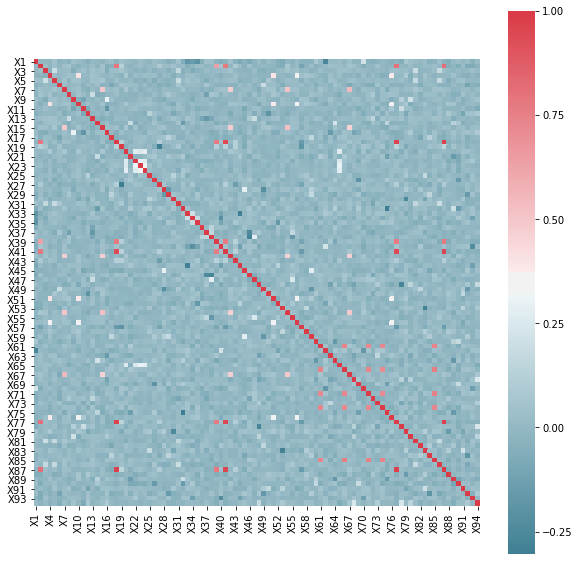

In [10]:
cont_df = data1.iloc[:,1:95]
f, ax = plt.subplots(figsize=(10, 10))
corr_mat1 =cont_df.corr()
sns.heatmap(corr_mat1, mask=np.zeros_like(corr_mat1, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

#### Correlation matrix without any nan values rows

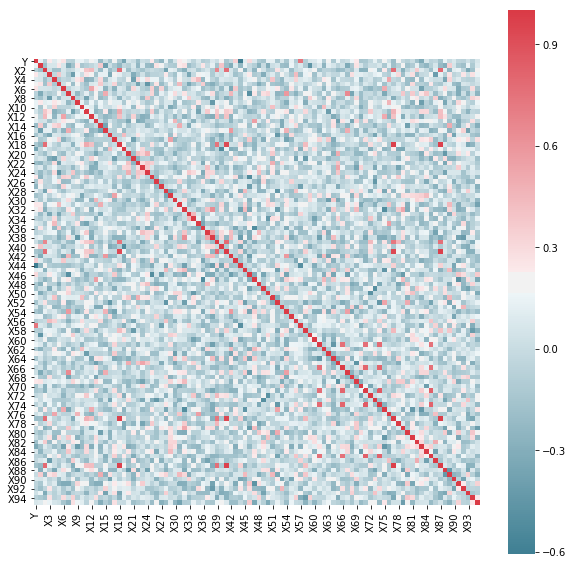

In [130]:
weak_data = data.dropna()
f, ax = plt.subplots(figsize=(10, 10))
corr_mat =weak_data.corr()
sns.heatmap(corr_mat, mask=np.zeros_like(corr_mat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [131]:
np.shape(weak_data)

(35, 101)

### Categorical variable missing data

In [187]:
factor_names = []
for col in data.columns:
    if data[col].dtype == 'object':
        print(data[col].describe())
        factor_names.append(col)

count     1088
unique       2
top          B
freq       578
Name: X96, dtype: object
count     1085
unique       3
top          B
freq       381
Name: X97, dtype: object
count     1087
unique       4
top          D
freq       336
Name: X98, dtype: object
count     1093
unique       4
top          D
freq       327
Name: X99, dtype: object
count     1091
unique       8
top          D
freq       153
Name: X100, dtype: object


#### Random values to replace the missing data

In [197]:
for col_name in factor_names:
    col_levels = np.unique(list(data1[col_name].dropna().values))
    n = len(data1[col_name])
    for i in range(n):
        if pd.isna(data1[col_name][i]):
            data1.iloc[col_name][i] = npr.choice(col_levels)

In [198]:
data1.isna().sum()

Y       1000
X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10        0
X11        0
X12        0
X13        0
X14        0
X15        0
X16        0
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25        0
X26        0
X27        0
X28        0
X29        0
        ... 
X71        0
X72        0
X73        0
X74        0
X75        0
X76        0
X77        0
X78        0
X79        0
X80        0
X81        0
X82        0
X83        0
X84        0
X85        0
X86        0
X87        0
X88        0
X89        0
X90        0
X91        0
X92        0
X93        0
X94        0
X95        0
X96        0
X97        0
X98        0
X99        0
X100       0
Length: 101, dtype: int64

In [200]:
# data1

### PCA with the continuous variables

In [201]:
from sklearn.datasets import make_blobs
from sklearn import decomposition

In [202]:
Y = np.asarray(data1.iloc[0:100, 0])
Y = Y.reshape(len(Y),1)
X = np.asmatrix(data1.iloc[0:100, 1:96])
pca = decomposition.PCA(n_components=4)
pc = pca.fit_transform(X)
pc_df = pd.DataFrame(data=pc, columns=['PC1','PC2','PC3','PC4'])
pc_df['Cluster'] = Y
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,-3.922157,-2.794372,-0.029101,0.510734,-4.551892
1,-5.068621,2.484162,0.861360,-0.175782,1.806876
2,-4.093655,0.290949,-0.692505,-0.251985,-7.418004
3,5.563586,0.472878,0.085827,3.947021,-8.776398
4,3.007257,0.566612,-1.295534,2.322561,-6.755842


In [203]:
pca.explained_variance_ratio_

array([0.07135178, 0.04492512, 0.04115176, 0.04054185])

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


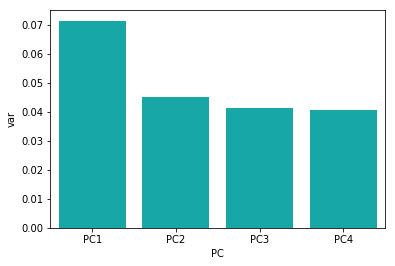

In [204]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var", data=df, color="c")

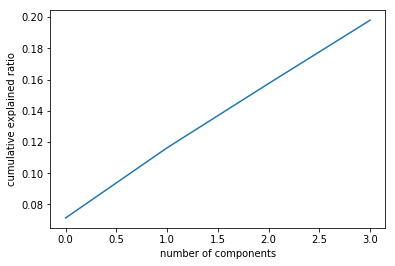

In [172]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained ratio')
plt.show()

### Colinearity

In [262]:
C = np.dot(X.T, X)
C_inv = npl.inv(C)
npl.norm(C_inv)

22.269708054773474

# II - PREDICTIONS

### MEAN SQUARE ERROR FUNCTION

In [231]:
def mean_square_error(Y, Yhat):
    return np.mean((Y-Yhat)**2)

## Regression with the data 

<B>
<i>
We try first to tranform categorical variables to numeric ones ffor the linear regression 
</i>
</B>

In [206]:
reg_data = data1.copy()
for col_name in factor_names:
    col_levels = np.unique(list(reg_data[col_name].dropna().values))
    reg_data[col_name] = reg_data[col_name].astype('category')
    reg_data[col_name] = reg_data[col_name].cat.reorder_categories(col_levels, ordered=True)
    reg_data[col_name] = reg_data[col_name].cat.codes
reg_data

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100
0,-4.551892,-1.809625,-0.913360,-0.218107,0.687713,-1.357434,3.087521,0.134304,5.501414,0.480548,...,1.935061,-0.364959,0.228810,-0.145521,-1.754263,1,0,2,2,7
1,1.806876,0.471175,-2.067355,-0.259221,1.682711,-0.899337,-0.448752,0.246285,2.007544,1.669644,...,2.129238,2.873889,-0.956736,2.946482,0.348536,1,1,3,1,1
2,-7.418004,3.145955,-1.434793,-2.355750,2.145708,-2.730022,0.181677,-1.603840,1.481230,0.863563,...,3.011292,0.023706,-0.118926,-1.329891,-0.549678,1,1,1,3,4
3,-8.776398,-0.966571,2.768401,-1.016546,2.579520,-2.989883,1.299483,0.537700,1.972970,0.214713,...,2.334895,0.131329,-1.506334,-1.198288,-0.061236,1,1,0,1,3
4,-6.755842,-0.998227,0.657886,-1.104707,1.289966,-3.907128,0.901370,0.497693,1.794773,0.779314,...,3.131590,-1.299633,-0.861064,0.672235,-0.659976,0,2,3,3,3
5,-9.608197,-0.821039,1.551050,0.444680,-0.486051,-1.789884,-0.663241,-0.340686,1.459655,1.187671,...,2.511478,3.341238,0.183425,-0.926873,-0.166359,1,1,1,3,3
6,-7.880446,1.062194,0.767016,-1.253419,0.694371,-2.804062,-0.699389,-1.451358,1.047900,0.449204,...,2.959558,-0.496117,0.689368,-0.857621,-1.273170,1,1,1,0,4
7,-6.824694,-0.728791,0.069527,-2.071430,1.281351,-0.411982,-0.198610,-0.120925,2.437306,-0.722936,...,2.529514,-0.600458,-2.068755,-0.126282,0.150750,0,0,3,3,0
8,-8.291015,0.384659,-0.475732,-0.100455,1.017080,-2.670592,0.137553,-0.049582,2.965567,-1.355147,...,1.017245,0.726432,-1.083649,1.545775,0.941172,0,0,2,1,5
9,2.178053,0.522873,-1.598506,1.389618,1.228536,-0.362776,2.866099,0.386848,1.540658,0.282538,...,2.489180,1.249810,0.249127,-0.682217,0.723193,0,1,2,0,4


## plotting Y[0:100]

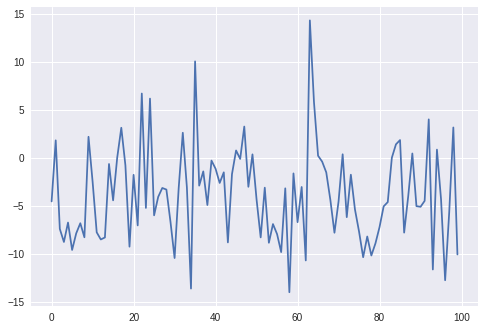

In [235]:
plt.plot(Y)
plt.show()

## 1- Linear Regression

In [236]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
X_reg = np.asmatrix(reg_data.iloc[0:100, 1:])
n, p = X_reg.shape
simple_linear_reg = lm.fit(X_reg, Y)
# pd.DataFrame(zip(reg_data.columns, lm.coef_[0]), columns=['features', 'estimatedcoefficients'])

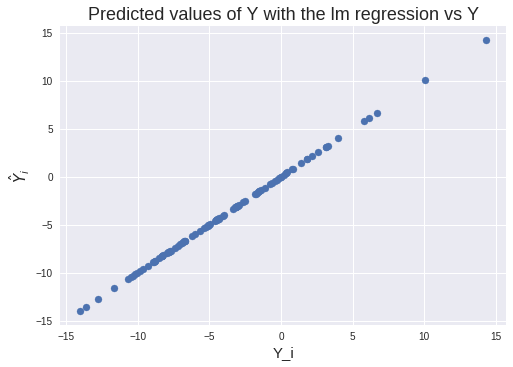

In [237]:
plt.scatter(Y,lm.predict(X_reg))
plt.xlabel('Y_i')
plt.ylabel('$\hat{Y}_i$')
plt.title('Predicted values of Y with the lm regression vs Y')
plt.show()

### Residual plots

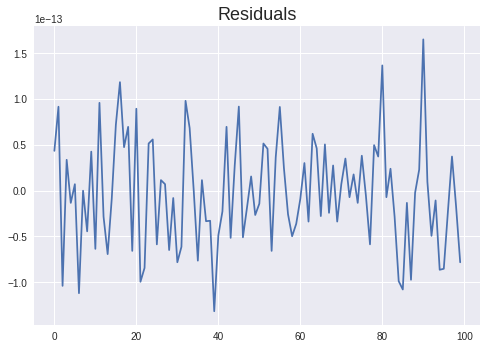

In [254]:
plt.plot(lm.predict(X_reg)-Y)
plt.title("Residuals")
plt.show()

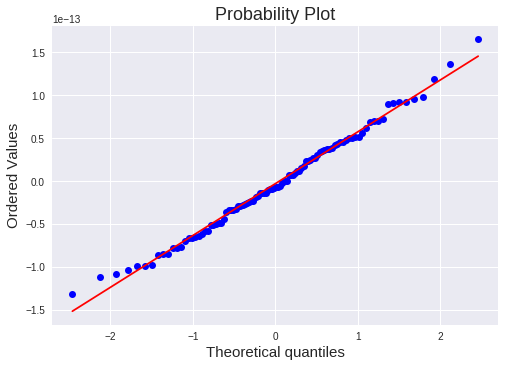

In [272]:
import scipy.stats as stats
import pylab 
stats.probplot((lm.predict(X_reg)-Y)[:,0], dist="norm", plot=pylab)
pylab.show()

In [278]:
print(mean_square_error(Y, lm.predict(X_reg)))

3.534907487858621e-27


### Prediction matrix for the regression

In [279]:
X_predict = np.asmatrix(reg_data.iloc[100:, 1:])
print(X_predict.shape)

(1000, 100)


## 2- Polynomial regression 

In [320]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree_max = 3
p = X_predict.shape[0]
poly_predict = np.zeros((p, degree_max))
lg = LinearRegression()
for i in range(degree_max):
    #print(i)
    poly = PolynomialFeatures(degree=i+1)
    #X_ = np.copy(poly.fit_transform(X_reg))
    #print(X_.shape)
    # Fit
    lg.fit(poly.fit_transform(X_reg), Y)
    Y_predict = lg.predict(poly.fit_transform(X_predict))
    #print(Y_predict.shape)
    poly_predict[:,i] = Y_predict.reshape(p)

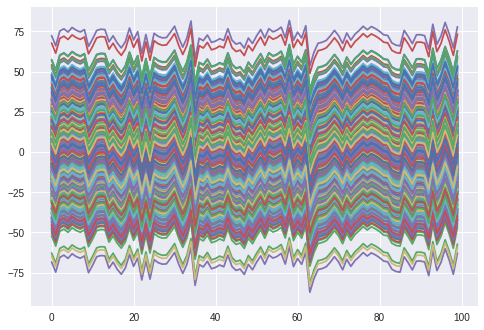

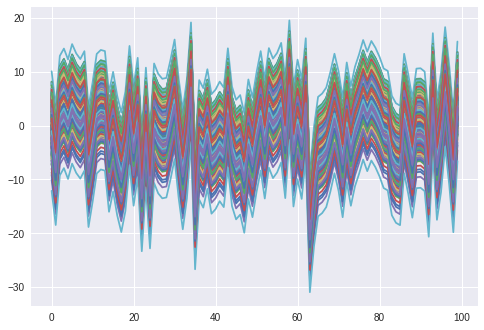

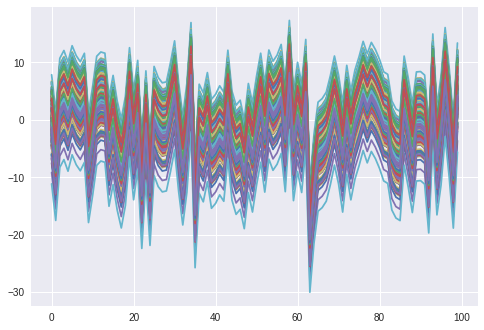

In [322]:
for i in range(degree_max):
    plt.plot(poly_predict[:,i]-Y)
    plt.show()